In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models,layers

In [2]:
data = tf.keras.preprocessing.image_dataset_from_directory(r"new",
                                                    shuffle=True,image_size=(256,256),
                                                   batch_size=32)

Found 6367 files belonging to 3 classes.


In [3]:
data.class_names

['Potato Early blight', 'Potato Late blight', 'Potato healthy']

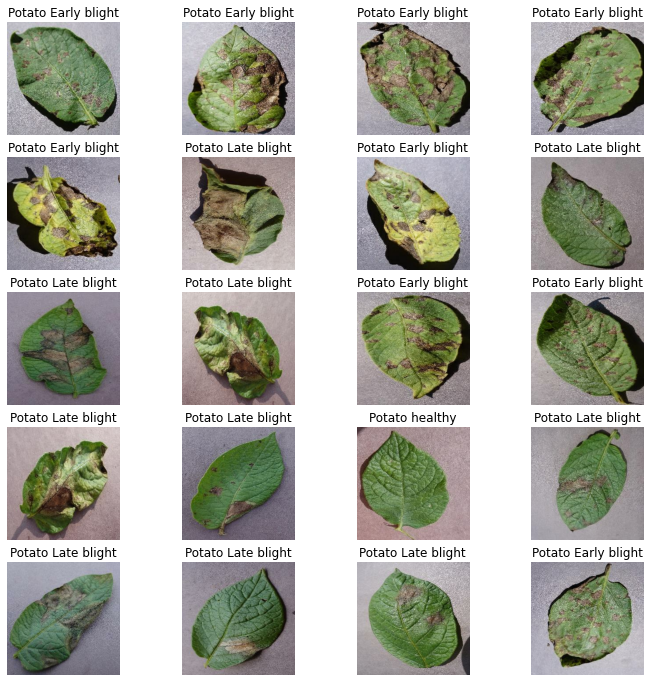

In [4]:
for image_batch,label_batch in data.take(1):
    plt.figure(figsize=(12,12))
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(data.class_names[label_batch[i]])
        

In [5]:
def get_partitions(dataset,train_size,validation_size,test_size,shuffle,shuffle_size):
    if (train_size+validation_size+test_size==1.0):
        if shuffle:
            dataset=dataset.shuffle(shuffle_size,seed=12)
        train_ds = dataset.take(int(train_size*len(dataset)))
        whole_test_ds = dataset.skip(int(train_size*len(dataset)))
        val_ds = whole_test_ds.take(int(validation_size*len(dataset)))
        test_ds = whole_test_ds.skip(int(validation_size*len(dataset)))
        return train_ds,val_ds,test_ds
    else:
        print('Incorrect parameters,the sum of all sizes should be equal to 1')

In [6]:
train,val,test = get_partitions(data,0.8,0.1,0.1,True,10000)

In [7]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [10]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
    
])
model.build(input_shape=(32,256,256,3))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [12]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [13]:
model_cus = model.fit(train,epochs=5,batch_size=32,verbose=1,validation_data=val)

Epoch 1/5
159/159 [==============================] - 339s 2s/step - loss: 0.6396 - accuracy: 0.6965 - val_loss: 0.3735 - val_accuracy: 0.8454
Epoch 2/5
159/159 [==============================] - 289s 2s/step - loss: 0.2673 - accuracy: 0.8907 - val_loss: 0.1789 - val_accuracy: 0.9424
Epoch 3/5
159/159 [==============================] - 343s 2s/step - loss: 0.1841 - accuracy: 0.9286 - val_loss: 0.1737 - val_accuracy: 0.9276
Epoch 4/5
159/159 [==============================] - 288s 2s/step - loss: 0.1267 - accuracy: 0.9505 - val_loss: 0.3796 - val_accuracy: 0.8717
Epoch 5/5
159/159 [==============================] - 314s 2s/step - loss: 0.0962 - accuracy: 0.9660 - val_loss: 0.1775 - val_accuracy: 0.9276


In [15]:
acc = model_cus.history['accuracy']
val_acc = model_cus.history['val_accuracy']

loss = model_cus.history['loss']
val_loss = model_cus.history['val_loss']

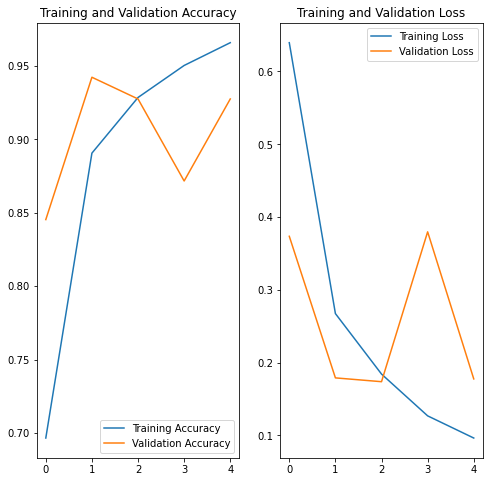

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

VGG

In [28]:
model_vgg = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [29]:
model_vgg.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [30]:
vgg =model.fit(train,epochs=5,batch_size=32,verbose=1,validation_data=val)

Epoch 1/5
159/159 [==============================] - 306s 2s/step - loss: 0.0760 - accuracy: 0.9703 - val_loss: 0.0728 - val_accuracy: 0.9836
Epoch 2/5
159/159 [==============================] - 291s 2s/step - loss: 0.0659 - accuracy: 0.9742 - val_loss: 0.0430 - val_accuracy: 0.9852
Epoch 3/5
159/159 [==============================] - 296s 2s/step - loss: 0.0898 - accuracy: 0.9672 - val_loss: 0.1121 - val_accuracy: 0.9523
Epoch 4/5
159/159 [==============================] - 287s 2s/step - loss: 0.0437 - accuracy: 0.9853 - val_loss: 0.1098 - val_accuracy: 0.9671
Epoch 5/5
159/159 [==============================] - 287s 2s/step - loss: 0.0509 - accuracy: 0.9815 - val_loss: 0.1377 - val_accuracy: 0.9523


In [31]:
acc_vgg = vgg.history['accuracy']
val_acc_vgg =vgg.history['val_accuracy']

loss_vgg = vgg.history['loss']
val_loss_vgg =vgg.history['val_loss']

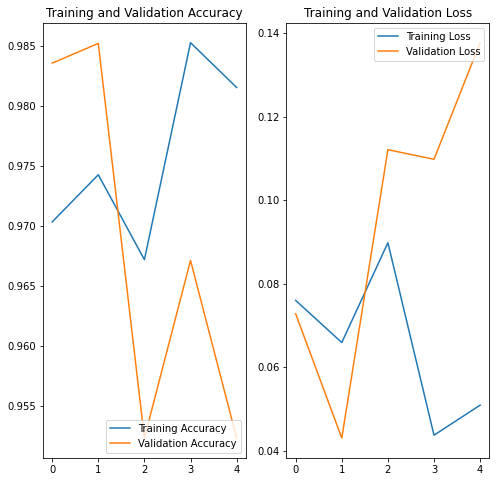

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc_vgg, label='Training Accuracy')
plt.plot(range(5), val_acc_vgg, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), loss_vgg, label='Training Loss')
plt.plot(range(5), val_loss_vgg, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()